# Numpy

In [292]:
import numpy as np

### 1. Linear equation 
Find x for Ax = b

In [293]:
A = np.array(
    [
         [ 1,  2,  3,  4],
         [ 3, -3,  8,  9],
         [ 5,  1, -4,  7],
         [-2,  5, -5,  1],
    ]
)
b = np.array([-5, 0, 10, -17])

In [399]:
x = np.linalg.solve(A, b)
np.set_printoptions(suppress=True)
x

array([[-17.3165, -16.6329],
       [ -2.0759,  -2.1519],
       [ -7.6835,  -7.3671],
       [ 13.3797,  12.7595]])

In [295]:
print('System is solved: ', np.allclose(np.dot(A, x), b))

System is solved:  True


**Tip:** have a look to np.set_printoptions

### 2. Cliping
Set all negatives values of array to zero

In [296]:
A = np.array(
    [
         [ 1,  2,  3,  4],
         [ 3, -3,  8,  9],
         [ 5,  1, -4,  7],
         [-2,  5, -5,  1],
    ]
)

In [297]:
A[A < 0] = 0
A.view()

array([[1, 2, 3, 4],
       [3, 0, 8, 9],
       [5, 1, 0, 7],
       [0, 5, 0, 1]])

In [298]:
print('In each row we have that much non-zeroes: ', np.count_nonzero(A, axis=1))

In each row we have that much non-zeroes:  [4 3 3 2]


### 3. Normalization
Normalize vector x (rescale values between 0, 1)

In [299]:
x = np.array([-4, 2, -1, 5, -10])

In [400]:
# Min-max scaling:
# the features are within a specific range [0, 1]
x = (x - np.min(x))/np.ptp(x)
print('Scaled x: ', x)
print(x.mean(), x.var())

Scaled x:  [[0.     0.0223]
 [0.4965 0.494 ]
 [0.3138 0.3241]
 [1.     0.9798]]
0.4538144329896907 0.1258763311722819


### 4. Standardize
Standardize image with shape (height, width, channels). \
Each channel should have zero mean and unit variance.

In [301]:
img = np.array([
     [[105, 121,  90], [109, 125,  94], [107, 125,  89], [106, 124, 86]],
     [[106, 123,  90], [107, 124,  91], [106, 125,  87], [108, 123, 81]],
     [[106, 123,  90], [107, 124,  91], [107, 126,  88], [107, 123, 85]],
     [[107, 125,  90], [106, 122,  89], [108, 126,  89], [103, 121, 83]]
], dtype=np.uint8)

In [302]:
# Check out what is the image
# from PIL import Image
# png_img = Image.fromarray(img)
# png_img.save('testrgb.png')

In [303]:
mean = np.mean(img, axis=(1, 2), keepdims=True)
std = np.std(img, axis=(1, 2), keepdims=True)
# Standartization or z-score normalization:
# a mean = 0 and a standard deviation = 1
standardized_img_out = (img - mean) / std
np.set_printoptions(precision=4, suppress=True)
print('Standardized image:\n', standardized_img_out)

Standardized image:
 [[[-0.1247  1.0152 -1.1933]
  [ 0.1603  1.3002 -0.9084]
  [ 0.0178  1.3002 -1.2646]
  [-0.0534  1.2289 -1.4783]]

 [[ 0.0055  1.1316 -1.0543]
  [ 0.0718  1.1978 -0.9881]
  [ 0.0055  1.2641 -1.253 ]
  [ 0.138   1.1316 -1.6505]]

 [[-0.0286  1.1378 -1.1264]
  [ 0.04    1.2065 -1.0578]
  [ 0.04    1.3437 -1.2636]
  [ 0.04    1.1378 -1.4695]]

 [[ 0.0846  1.3032 -1.0663]
  [ 0.0169  1.1001 -1.134 ]
  [ 0.1523  1.3709 -1.134 ]
  [-0.1862  1.0324 -1.5402]]]


In [304]:
# Check out the result
h = standardized_img_out[:, :, 0]
print('Height, mean: ', h.mean(), ', var: ', h.var())
w = standardized_img_out[:, :, 1]
print('Width, mean: ', w.mean(), ', var: ', w.var())
ch = standardized_img_out[:, :, 2]
print('Chennel, mean: ', ch.mean(), ', var: ', ch.var())

Height, mean:  0.023748993518126916 , var:  0.008160978631077008
Width, mean:  1.2001347758586345 , var:  0.01092920273875579
Chennel, mean:  -1.223883769376762 , var:  0.042130842767916364


### 5. Euclidian distance
Calculate distance matrix between two sets of points 

In [305]:
a = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[9, 8], [7, 6], [5, 4], [3, 2]])

In [306]:
# One loop solution:
# dists = [[] for _ in range(3)]
# for i in range(a.shape[0]):
#     dists[i] = np.sqrt(np.sum(np.square(a - b[i, :]), axis=1))

# No loop solution
dists = np.zeros((a.shape[0], b.shape[0]))
a_sq = np.sum(np.square(a), axis=1)
b_sq = np.sum(np.square(b), axis=1)
a_b_dot = np.dot(a, b.T)
# make a column out of a_sq
# make a row out of b_sq
dists = np.sqrt(a_sq[:, np.newaxis] + b_sq[np.newaxis, :] - 2*a_b_dot)

In [307]:
dists

array([[10.    ,  7.2111,  4.4721,  2.    ],
       [ 7.2111,  4.4721,  2.    ,  2.    ],
       [ 4.4721,  2.    ,  2.    ,  4.4721]])

# Pandas

In [308]:
import pandas as pd
url = "https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv"
df = pd.read_csv(url)

### Task 1
Find the name, age and sex of oldest passenger on Titanic

In [309]:
# Show the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [310]:
oldest = df.loc[df['Age'] == max(df['Age'])]
def get_data(col):
    return (oldest[col]).to_string(index=False)
# Result:
print('Name: ', get_data('Name'), ',\n Age: ', get_data('Age'), ',\n Sex: ', get_data('Sex'))

Name:   Barkworth, Mr. Algernon Henry Wilson ,
 Age:   80.0 ,
 Sex:   male


### Task 2
Show rows with passengers with age greater than 5 percantile and less than 95 percantile

In [311]:
q1 = df.Age.quantile(.05)
q2 = df.Age.quantile(.95)
# Result:
df[(df['Age'] >= q1) & (df['Age'] <= q2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Task 3

Show correlation between features

In [312]:
# Prepare data
df['IsMale'] = pd.get_dummies(df["Sex"], drop_first=True)
df[["EmbarkedC", "EmbarkedQ", "EmbarkedS"]] = pd.get_dummies(df["Embarked"])
# Show changes
df.filter(like="Embarked").head(5)
# Filter and fill none objects
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
IsMale           0
EmbarkedC        0
EmbarkedQ        0
EmbarkedS        0
dtype: int64

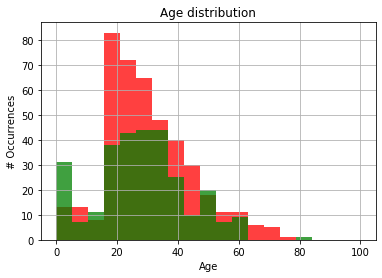

In [313]:
import matplotlib.pyplot as plt
%matplotlib inline

bins = np.linspace(0, 100, 20, endpoint=True)

ax = df[df['Survived'] == 0].Age.hist(bins=bins, color='r', alpha=0.75)
df[df['Survived'] == 1].Age.hist(bins=bins, color='g', alpha=0.75)

ax.set_title('Age distribution')
ax.set_xlabel('Age')
ax.set_ylabel('# Occurrences')

plt.show()

In [314]:
not_survived_mean = df[df["Survived"] == 0]["Age"].mean()
survived_mean = df[df["Survived"] == 1]["Age"].mean()
df.loc[(df["Survived"] == 0) & (df["Age"].isnull()), "Age"] = not_survived_mean
df.loc[(df["Survived"] == 1) & (df["Age"].isnull()), "Age"] = survived_mean

In [315]:
# Check out it ones more
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
IsMale           0
EmbarkedC        0
EmbarkedQ        0
EmbarkedS        0
dtype: int64

In [316]:
df_X = df[["Pclass", "Age", "SibSp", "Parch", "Fare", "IsMale", "EmbarkedC", "EmbarkedQ", "EmbarkedS"]]
df_X.head()

,Pclass,Age,SibSp,Parch,Fare,IsMale,EmbarkedC,EmbarkedQ,EmbarkedS
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1


In [317]:
df_y = df[["Survived"]]
df_y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [354]:
# Show correlatoin 
df[df.columns[1:]].corr()['Survived'][:]
# xxx: is it enough??

Survived       1.000000
Pclass         0.338481
Age            0.085364
SibSp          0.035322
Parch         -0.081629
Fare          -0.257307
IsMale         0.543351
EmbarkedC     -0.168240
EmbarkedQ     -0.003650
EmbarkedS      0.155660
NotSurvived   -1.000000
1             -1.000000
0              1.000000
Name: Survived, dtype: float64

### Task 4
Find average fare for survived and not survived passengers 

In [319]:
print('An average fare that survived people paied: ', np.average(df[df_y['Survived'] == 1].Fare))
print('An average fare that unsurvived people paied: ', np.average(df[df_y['Survived'] == 0].Fare))

An average fare that survived people paied:  48.39540760233918
An average fare that unsurvived people paied:  22.117886885245902


### Task 5
Vizualize boxplot to compare distributions of survived and not survived passengers.

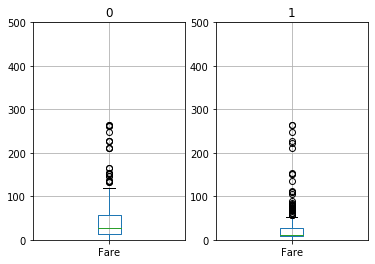

In [396]:
df_box = df[["Fare"]]
df_1 = df_box[df['Survived'] == 1]
df_0 = df_box[df['Survived'] == 0]

fig, axs = plt.subplots(1, 2)
axs[0].set_ylim([0, 500])
axs[1].set_ylim([0, 500])

axs[1].set_title('1')
df_1.boxplot(ax=axs[1])

axs[0].set_title('0')
df_0.boxplot(ax=axs[0])